In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import ShuffleSplit
import matplotlib.lines as mlines



In [2]:
data = pd.read_csv('data.csv', index_col=0)
data['class'] = np.where(data['class'] == 'E', 0, (np.where(data['class'] == 'A', 1, 2)))
data.head()

,1,2,3,4,5,6,7,8,9,10,class
0,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,2
1,0.019197,-0.040001,0.288973,-0.042597,0.261718,-1.013906,0.069175,0.890701,0.095265,-0.842014,2
2,0.043885,-0.173471,0.285416,-0.775121,0.172340,-0.391033,0.333428,-1.807711,-0.996086,-0.410850,2
3,-0.091897,0.297600,0.079145,0.196496,0.261718,-0.183409,0.220177,0.305093,-0.278912,-0.163443,2
4,0.438888,0.195534,0.143160,-0.809435,0.261718,-1.138481,-0.232828,-0.087894,-0.278912,-0.802015,2


In [3]:
# Split train and test sets

splitter = ShuffleSplit(train_size=.8, random_state=76)
X, y = data.loc[:, data.columns != 'class'], data['class']

for train_idx, test_idx in splitter.split(X):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

2 Define the MLP architecture of an Automatic Classifier with r =3 classes
- select an MLP architecture with three layers L1, H, L2, extended by a Softmax function and its
final output layer OUT
L1 => H => L2=> softmax => OUT
of respective dimensions
p = dim(L1) = # descriptors, h = dim(H) , dim(L2) = 3 ; dim(OUT) =3
- select a response function (either the sigmoid function or the RELU function) to be set for all
neurons
- the goal of the MLP classifier is to provide for each input vector Xk an output probability
vector OUTk very close to the binary vector encoding the true class of the input Xk
- explain precisely what is the part played by the softmax function, and how the final
classification of Xk is computed from OUTk

In [4]:
# hidden layer size h
dim_l1 = len(X_train.columns)
h = 100
dim_l2 = 3

model = keras.models.Sequential([
    keras.layers.Input(dim_l1, name= 'Input'),
    keras.layers.Dense(h, activation='relu', name = 'H'),
    keras.layers.Dense(dim_l2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
H (Dense)                    (None, 100)               1100      
_________________________________________________________________
dense (Dense)                (None, 3)                 303       
Total params: 1,403
Trainable params: 1,403
Non-trainable params: 0
_________________________________________________________________


3. Select 2 tentative sizes h for the hidden layer

To estimate one small but plausible value for h, namely h = h95 < p , apply PCA analysis to
your training set of input vectors to generate p eigenvalues ordered in decreasing order
Plot this decreasing sequence of eigenvalues in yr report
Compute the smallest number "h95" of eigenvalues preserving 95% of the total sum of
eigenvalues
To estimate one larger plausible value hL for the size h , proceed as follows
- apply PCA analysis to the set of Mj input vectors corresponding to the class Cj, with j=1,2 3 to
generate Mj eigenvalues in decreasing order, and compute the smallest number "Uj" of
eigenvalues preserving 95% of the total sum of these Mj eigenvalues;
- then define hL = U1 + U2 +U3.

In [5]:
X_train_cov = X_train.cov()

# get eigen vals and eigen vects
eigen_values, eigen_vectors = np.linalg.eig(X_train_cov)

# get index of sorted eigen vals
eigen_sorted_idx = eigen_values.argsort()[::-1]

# re-arrange eigen vals and eigen vects in decreasing order
eigen_values, eigen_vectors = eigen_values[eigen_sorted_idx], eigen_vectors[eigen_sorted_idx]

Text(0, 0.5, 'cumulative explained variance')

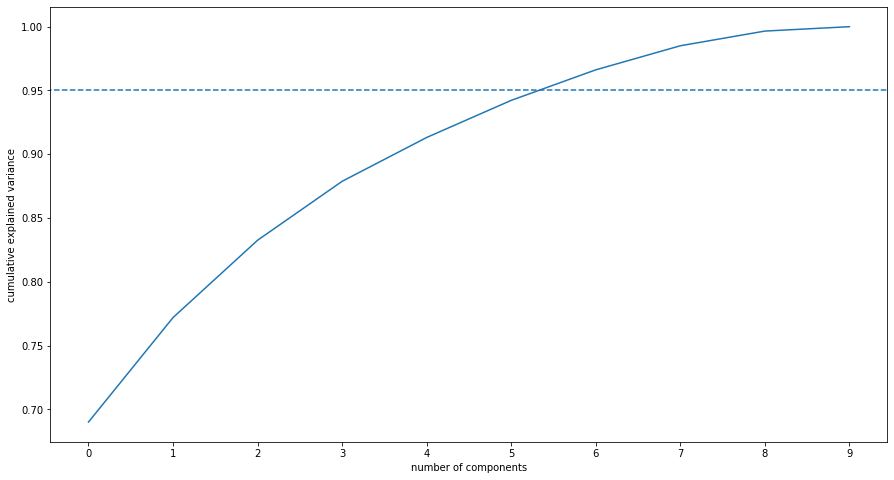

In [6]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X_train)

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_xticks(np.arange(0,10))
line = mlines.Line2D([-0.5,10],[.95, .95], linestyle='--')
ax.add_line(line)

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

## To preserve 95% variance, we will need around 7 components, thus set h95 = 7

In [7]:
h95 = 7

## Apply PCA separately on class 1, 2 and 3

### For class 1

In [8]:
X_train_CL1 = X_train[y_train == 0]
X_train_CL2 = X_train[y_train == 1]
X_train_CL3 = X_train[y_train == 2]


### For class 1, number of components to preserve 95% variance is U1 = 8

Text(0, 0.5, 'cumulative explained variance')

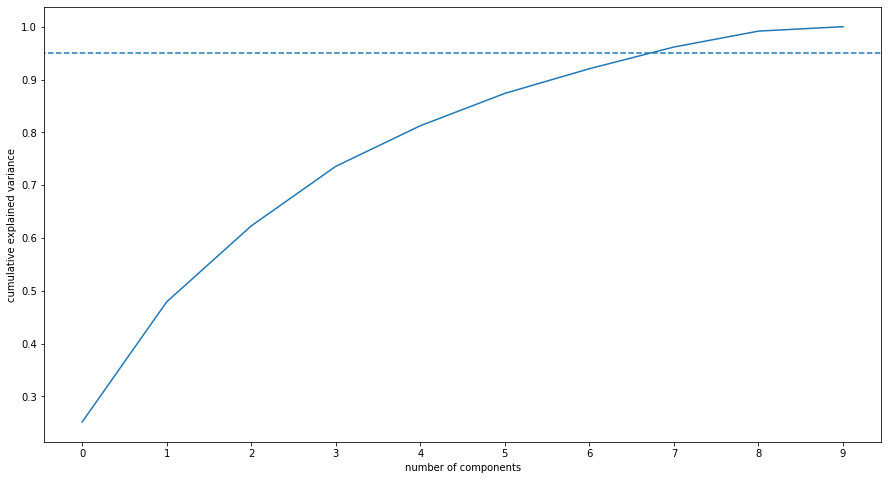

In [9]:
pca_CL1 = PCA()

pca_CL1.fit(X_train_CL1)

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(np.cumsum(pca_CL1.explained_variance_ratio_))
ax.set_xticks(np.arange(0,10))
line = mlines.Line2D([-0.5,10],[.95, .95], linestyle='--')
ax.add_line(line)

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### For class 2, number of components to preserve 95% variance is U1 = 5

Text(0, 0.5, 'cumulative explained variance')

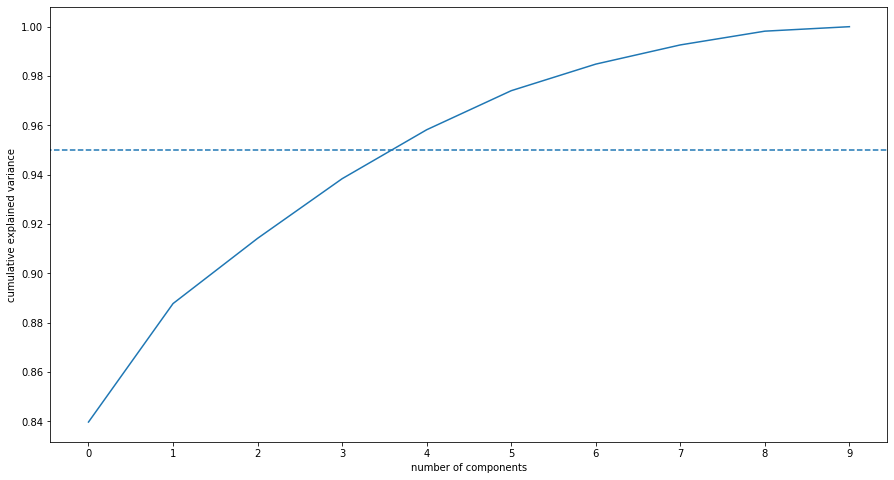

In [10]:
pca_CL2 = PCA()

pca_CL2.fit(X_train_CL2)

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(np.cumsum(pca_CL2.explained_variance_ratio_))
ax.set_xticks(np.arange(0,10))
line = mlines.Line2D([-0.5,10],[.95, .95], linestyle='--')
ax.add_line(line)

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### For class 3, number of components to preserve 95% variance is U3 = 8

Text(0, 0.5, 'cumulative explained variance')

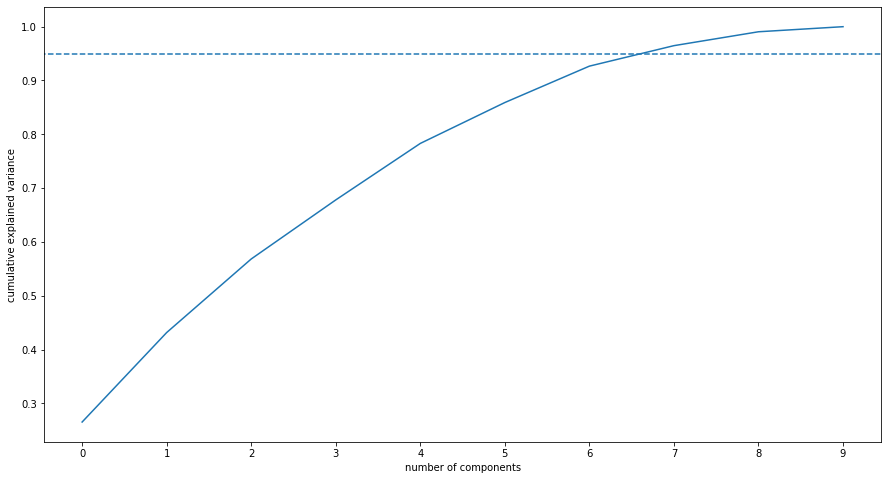

In [11]:
pca_CL3 = PCA()

pca_CL3.fit(X_train_CL3)

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(np.cumsum(pca_CL3.explained_variance_ratio_))
ax.set_xticks(np.arange(0,10))
line = mlines.Line2D([-0.5,10],[.95, .95], linestyle='--')
ax.add_line(line)

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [12]:
u1 = 8; u2= 5; u3= 8

hL = u1 + u2 + u3

3. for each one of the 2 values h= h95, h=hL implement automatic training
- use gradient descent to minimize avCRE= average CROSS ENTROPY error between
computed and true values of the probability OUTk
- explain precisely what is aCRE during training and after each epoch
- indicate which software environment you will use for HW2
- indicate precisely which software functions you are choosing to implement MLP learning
with aCRE loss function;
-list clearly what are the options offered for this task, namely for initialization of the weights, for
batch learning , for the successive gradient descent steps sizes ε(n), for stopping the learning, for
intermediary outputs to monitor learning quality
- indicate your selections for batch size B, for time dependent gradient descent step size, for
gradient descent algorithm, for stopping the learning, for random initialization of weights and
thresholds
automatic learning typically implements successive steps
- at STEP(n-1) select a new batch BATn containing B cases, and apply the learning rule to
update the last vector of weights and thresholds W(n-1) into a new vector Wn which includes
both thresholds and weights .
- compute the batch average cross-entropy error bavCREn by running the MLP parametrized
by Wn on the current Batch BATn, and compute the vector Gn = gradient of BACREn at step n
by the formula Gn = ( 1/ ε(n) ) [ W(n+1)- W(n) ]

- compute and plot the curve n baCREn
- compute and plot the curve n || W(n+1)- W(n)|| / ||Wn||
- compute the gradient norm ||Gn|| = ( 1/ ε(n) ) || W(n+1)- W(n)|| and
the (fixed) dimension D of the gradient vector Gn,
- plot the curve n ||Gn|| / d where d is the square root of D
- comment on these three curves

## For this homework, we use Keras. The models built are Sequential models.

In [13]:
# hidden layer size h
dim_l1 = len(X_train.columns)
h = h95
dim_l2 = 3

model_h95 = keras.models.Sequential([
    keras.layers.Input(dim_l1, name= 'Input'),
    keras.layers.Dense(h, activation='relu', name = 'H'),
    keras.layers.Dense(dim_l2, activation='softmax')
])

model_h95.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
H (Dense)                    (None, 7)                 77        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 24        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


### As we see below, for each layers, the weights are initialized randomly, and the biases are initialized to 0. We can change the initialization of weights by setting values to kernel_initializer, and change the initialization of biases by setting values to bias_initializer.

In [14]:
model_h95.layers[0].get_weights()

[array([[ 0.20809555, -0.31174725,  0.41186547, -0.4461548 , -0.05624735,
         -0.4126098 , -0.05431467],
        [-0.32080454,  0.13716698, -0.5241477 ,  0.4438125 ,  0.24584913,
          0.12814373, -0.55625886],
        [-0.32737672, -0.14254287,  0.05976987, -0.30245188,  0.16559988,
         -0.08316267, -0.3271787 ],
        [-0.09437844,  0.49426866, -0.51533914,  0.38081062, -0.58113116,
         -0.43690515, -0.13835806],
        [ 0.27455753,  0.14400208, -0.35512304,  0.04286289, -0.41865772,
          0.25491506,  0.14654154],
        [ 0.01328415, -0.32367364,  0.5733967 ,  0.48904157, -0.1923638 ,
         -0.58474886,  0.58646834],
        [ 0.5918213 , -0.50986934,  0.3413685 , -0.3752991 , -0.11378649,
          0.25908625,  0.15753734],
        [ 0.5674094 , -0.02283984, -0.13621745, -0.47352678,  0.34321493,
          0.02157289, -0.13068873],
        [-0.5311465 ,  0.51886094,  0.2724343 , -0.03817177,  0.394454  ,
         -0.23800346,  0.03578496],
        [ 

## After setting up the model, we will need to compile it. When calling a .compile() method, we can choose:
##  - Optimizers: SGD (Sochastic Gradient Descent), RMSprop, Adagrad, Adamax, Adam, Adadelta, Nadam (more details about the optimizers can be found here https://keras.io/optimizers/). For each optimizer, we can also specify the learning_rate parameter.
## - Loss: list of losses can be found here https://keras.io/losses/
## - Metrics: metrics is used to judge the performance of the model. Full list of metrics can be found here https://keras.io/metrics/

In [15]:
model_h95.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = 'sgd', 
                 metrics= ['accuracy'])

In [21]:
np.log(0.33)

-1.1086626245216111

## The loss is around 1.1 and the accuracy is around 0.41.  Averagely, if the true class probability is around 0.33 or less, which means it gets wronly predicted, the loss is around 1.1 ( ~np.log(0.33)).

In [16]:
history = model_h95.fit(x = X_train, y = y_train,\
                       batch_size = 64, epochs = 1,\
                       validation_split = .2)

Train on 8056 samples, validate on 2015 samples
8056/8056 [==============================] - 1s 71us/sample - loss: 1.1701 - accuracy: 0.4049 - val_loss: 1.1029 - val_accuracy: 0.4084


## To test if the model is on the right track, among ~10,000 samples of training set, we set aside ~2,000 samples for validation set and the rest for training set.

## After the first 200 epochs, below is the graph of train loss, validation loss, train accuracy and validation accuracy. We can see that both train and validation losses steadily decrease while accuracries are increasings, there is not any big gaps between those among train and validation sets, thus there is not a problem of overfitting or underfitting. The accuracies are still steadily increasing so if we keep training more, the model will have a chance to improve.

In [22]:
history = model_h95.fit(x = X_train, y = y_train,\
                       batch_size = 64, epochs = 200,\
                       validation_split = .2)



Train on 8056 samples, validate on 2015 samples
Epoch 1/200
8056/8056 [==============================] - 0s 22us/sample - loss: 1.1062 - accuracy: 0.4459 - val_loss: 1.0702 - val_accuracy: 0.4521
Epoch 2/200
8056/8056 [==============================] - 0s 22us/sample - loss: 1.0671 - accuracy: 0.4757 - val_loss: 1.0473 - val_accuracy: 0.4759
Epoch 3/200
8056/8056 [==============================] - 0s 22us/sample - loss: 1.0380 - accuracy: 0.4919 - val_loss: 1.0283 - val_accuracy: 0.4849
Epoch 4/200
8056/8056 [==============================] - 0s 22us/sample - loss: 1.0159 - accuracy: 0.5096 - val_loss: 1.0113 - val_accuracy: 0.5042
Epoch 5/200
8056/8056 [==============================] - 0s 25us/sample - loss: 0.9959 - accuracy: 0.5263 - val_loss: 0.9959 - val_accuracy: 0.5156
Epoch 6/200
8056/8056 [==============================] - 0s 34us/sample - loss: 0.9795 - accuracy: 0.5366 - val_loss: 0.9817 - val_accuracy: 0.5236
Epoch 7/200
8056/8056 [==============================] - 0s 24us

Epoch 56/200
8056/8056 [==============================] - 0s 22us/sample - loss: 0.7446 - accuracy: 0.6698 - val_loss: 0.7626 - val_accuracy: 0.6591
Epoch 57/200
8056/8056 [==============================] - 0s 21us/sample - loss: 0.7430 - accuracy: 0.6708 - val_loss: 0.7608 - val_accuracy: 0.6586
Epoch 58/200
8056/8056 [==============================] - 0s 21us/sample - loss: 0.7415 - accuracy: 0.6728 - val_loss: 0.7590 - val_accuracy: 0.6630
Epoch 59/200
8056/8056 [==============================] - 0s 21us/sample - loss: 0.7399 - accuracy: 0.6713 - val_loss: 0.7575 - val_accuracy: 0.6635
Epoch 60/200
8056/8056 [==============================] - 0s 21us/sample - loss: 0.7385 - accuracy: 0.6740 - val_loss: 0.7559 - val_accuracy: 0.6650
Epoch 61/200
8056/8056 [==============================] - 0s 21us/sample - loss: 0.7371 - accuracy: 0.6732 - val_loss: 0.7545 - val_accuracy: 0.6655
Epoch 62/200
8056/8056 [==============================] - 0s 21us/sample - loss: 0.7358 - accuracy: 0.6755

Epoch 111/200
8056/8056 [==============================] - 0s 22us/sample - loss: 0.6880 - accuracy: 0.6950 - val_loss: 0.7076 - val_accuracy: 0.6873
Epoch 112/200
8056/8056 [==============================] - 0s 23us/sample - loss: 0.6869 - accuracy: 0.6935 - val_loss: 0.7068 - val_accuracy: 0.6859
Epoch 113/200
8056/8056 [==============================] - 0s 22us/sample - loss: 0.6859 - accuracy: 0.6943 - val_loss: 0.7061 - val_accuracy: 0.6868
Epoch 114/200
8056/8056 [==============================] - 0s 22us/sample - loss: 0.6846 - accuracy: 0.6951 - val_loss: 0.7050 - val_accuracy: 0.6868
Epoch 115/200
8056/8056 [==============================] - 0s 21us/sample - loss: 0.6838 - accuracy: 0.6955 - val_loss: 0.7043 - val_accuracy: 0.6903
Epoch 116/200
8056/8056 [==============================] - 0s 21us/sample - loss: 0.6827 - accuracy: 0.6955 - val_loss: 0.7037 - val_accuracy: 0.6928
Epoch 117/200
8056/8056 [==============================] - 0s 21us/sample - loss: 0.6828 - accuracy:

8056/8056 [==============================] - 0s 36us/sample - loss: 0.6401 - accuracy: 0.7150 - val_loss: 0.6572 - val_accuracy: 0.7211
Epoch 166/200
8056/8056 [==============================] - 0s 23us/sample - loss: 0.6395 - accuracy: 0.7156 - val_loss: 0.6563 - val_accuracy: 0.7196
Epoch 167/200
8056/8056 [==============================] - 0s 22us/sample - loss: 0.6386 - accuracy: 0.7162 - val_loss: 0.6554 - val_accuracy: 0.7191
Epoch 168/200
8056/8056 [==============================] - 0s 22us/sample - loss: 0.6379 - accuracy: 0.7169 - val_loss: 0.6547 - val_accuracy: 0.7186
Epoch 169/200
8056/8056 [==============================] - 0s 23us/sample - loss: 0.6370 - accuracy: 0.7169 - val_loss: 0.6536 - val_accuracy: 0.7216
Epoch 170/200
8056/8056 [==============================] - 0s 22us/sample - loss: 0.6362 - accuracy: 0.7180 - val_loss: 0.6530 - val_accuracy: 0.7201
Epoch 171/200
8056/8056 [==============================] - 0s 27us/sample - loss: 0.6355 - accuracy: 0.7174 - val_

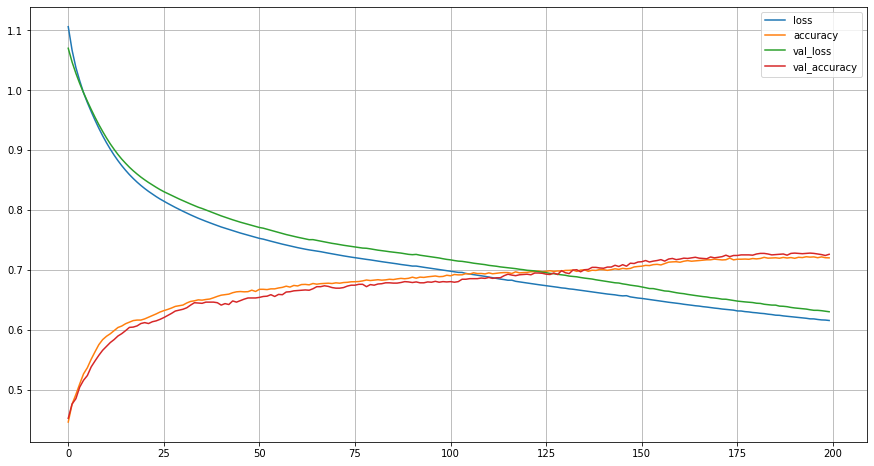

In [23]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)



## After another 100 epochs, the accuracy increased a little bit to .73,

In [24]:
history = model_h95.fit(x = X_train, y = y_train,\
                       batch_size = 64, epochs = 100,\
                       validation_split = .2)




Train on 8056 samples, validate on 2015 samples
Epoch 1/100
8056/8056 [==============================] - 0s 26us/sample - loss: 0.6147 - accuracy: 0.7213 - val_loss: 0.6294 - val_accuracy: 0.7241
Epoch 2/100
8056/8056 [==============================] - 0s 22us/sample - loss: 0.6139 - accuracy: 0.7224 - val_loss: 0.6296 - val_accuracy: 0.7256
Epoch 3/100
8056/8056 [==============================] - 0s 23us/sample - loss: 0.6137 - accuracy: 0.7228 - val_loss: 0.6278 - val_accuracy: 0.7246
Epoch 4/100
8056/8056 [==============================] - 0s 23us/sample - loss: 0.6128 - accuracy: 0.7226 - val_loss: 0.6270 - val_accuracy: 0.7231
Epoch 5/100
8056/8056 [==============================] - 0s 28us/sample - loss: 0.6122 - accuracy: 0.7203 - val_loss: 0.6267 - val_accuracy: 0.7270
Epoch 6/100
8056/8056 [==============================] - 0s 29us/sample - loss: 0.6118 - accuracy: 0.7210 - val_loss: 0.6261 - val_accuracy: 0.7241
Epoch 7/100
8056/8056 [==============================] - 0s 24us

Epoch 56/100
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5892 - accuracy: 0.7188 - val_loss: 0.6015 - val_accuracy: 0.7251
Epoch 57/100
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5891 - accuracy: 0.7205 - val_loss: 0.6008 - val_accuracy: 0.7275
Epoch 58/100
8056/8056 [==============================] - 0s 24us/sample - loss: 0.5885 - accuracy: 0.7210 - val_loss: 0.6006 - val_accuracy: 0.7236
Epoch 59/100
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5883 - accuracy: 0.7205 - val_loss: 0.6005 - val_accuracy: 0.7270
Epoch 60/100
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5880 - accuracy: 0.7202 - val_loss: 0.5997 - val_accuracy: 0.7266
Epoch 61/100
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5878 - accuracy: 0.7208 - val_loss: 0.5993 - val_accuracy: 0.7285
Epoch 62/100
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5875 - accuracy: 0.7207

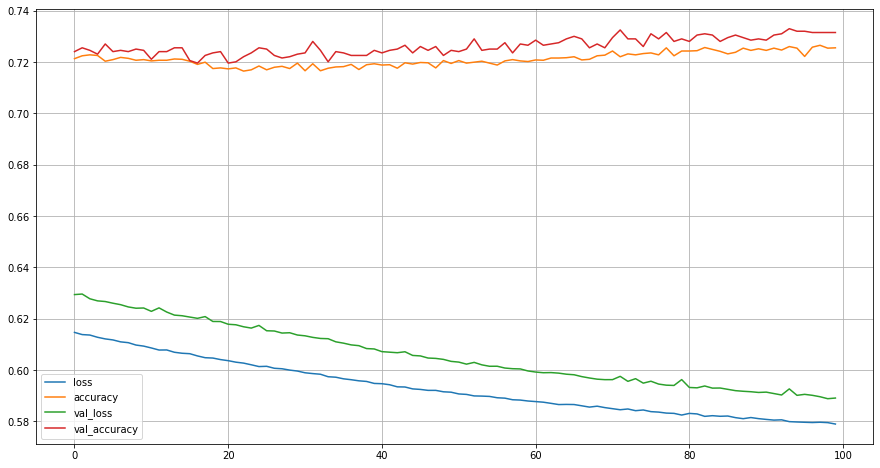

In [25]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)

## After 200 extra epochs, the accuracy is up to .76

In [26]:
history = model_h95.fit(x = X_train, y = y_train,\
                       batch_size = 64, epochs = 200,\
                       validation_split = .2)


Train on 8056 samples, validate on 2015 samples
Epoch 1/200
8056/8056 [==============================] - 0s 23us/sample - loss: 0.5790 - accuracy: 0.7270 - val_loss: 0.5893 - val_accuracy: 0.7305
Epoch 2/200
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5786 - accuracy: 0.7241 - val_loss: 0.5907 - val_accuracy: 0.7325
Epoch 3/200
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5787 - accuracy: 0.7247 - val_loss: 0.5893 - val_accuracy: 0.7325
Epoch 4/200
8056/8056 [==============================] - 0s 30us/sample - loss: 0.5784 - accuracy: 0.7265 - val_loss: 0.5883 - val_accuracy: 0.7310
Epoch 5/200
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5786 - accuracy: 0.7237 - val_loss: 0.5885 - val_accuracy: 0.7335
Epoch 6/200
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5786 - accuracy: 0.7258 - val_loss: 0.5893 - val_accuracy: 0.7355
Epoch 7/200
8056/8056 [==============================] - 0s 22us

Epoch 56/200
8056/8056 [==============================] - 0s 23us/sample - loss: 0.5712 - accuracy: 0.7308 - val_loss: 0.5810 - val_accuracy: 0.7375
Epoch 57/200
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5712 - accuracy: 0.7299 - val_loss: 0.5804 - val_accuracy: 0.7390
Epoch 58/200
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5716 - accuracy: 0.7306 - val_loss: 0.5803 - val_accuracy: 0.7390
Epoch 59/200
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5714 - accuracy: 0.7295 - val_loss: 0.5800 - val_accuracy: 0.7395
Epoch 60/200
8056/8056 [==============================] - 0s 24us/sample - loss: 0.5709 - accuracy: 0.7311 - val_loss: 0.5798 - val_accuracy: 0.7419
Epoch 61/200
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5707 - accuracy: 0.7311 - val_loss: 0.5799 - val_accuracy: 0.7414
Epoch 62/200
8056/8056 [==============================] - 0s 24us/sample - loss: 0.5705 - accuracy: 0.7316

Epoch 111/200
8056/8056 [==============================] - 0s 23us/sample - loss: 0.5638 - accuracy: 0.7337 - val_loss: 0.5711 - val_accuracy: 0.7474
Epoch 112/200
8056/8056 [==============================] - 0s 24us/sample - loss: 0.5640 - accuracy: 0.7344 - val_loss: 0.5700 - val_accuracy: 0.7459
Epoch 113/200
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5641 - accuracy: 0.7340 - val_loss: 0.5698 - val_accuracy: 0.7469
Epoch 114/200
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5637 - accuracy: 0.7346 - val_loss: 0.5694 - val_accuracy: 0.7469
Epoch 115/200
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5637 - accuracy: 0.7357 - val_loss: 0.5688 - val_accuracy: 0.7474
Epoch 116/200
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5633 - accuracy: 0.7363 - val_loss: 0.5693 - val_accuracy: 0.7489
Epoch 117/200
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5629 - accuracy:

8056/8056 [==============================] - 0s 22us/sample - loss: 0.5550 - accuracy: 0.7402 - val_loss: 0.5598 - val_accuracy: 0.7504
Epoch 166/200
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5550 - accuracy: 0.7417 - val_loss: 0.5604 - val_accuracy: 0.7519
Epoch 167/200
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5548 - accuracy: 0.7408 - val_loss: 0.5604 - val_accuracy: 0.7514
Epoch 168/200
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5548 - accuracy: 0.7423 - val_loss: 0.5595 - val_accuracy: 0.7573
Epoch 169/200
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5543 - accuracy: 0.7423 - val_loss: 0.5590 - val_accuracy: 0.7538
Epoch 170/200
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5542 - accuracy: 0.7401 - val_loss: 0.5588 - val_accuracy: 0.7538
Epoch 171/200
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5543 - accuracy: 0.7426 - val_

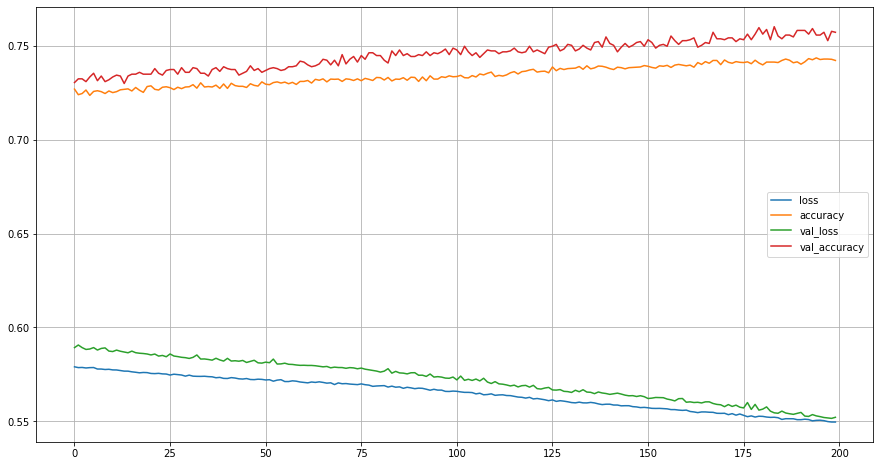

In [27]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)

## After 500 more epochs, the accuracy is still around .76 so the model is not improving anymore.

In [28]:
history = model_h95.fit(x = X_train, y = y_train,\
                       batch_size = 64, epochs = 500,\
                       validation_split = .2)



Train on 8056 samples, validate on 2015 samples
Epoch 1/500
8056/8056 [==============================] - 0s 23us/sample - loss: 0.5497 - accuracy: 0.7437 - val_loss: 0.5514 - val_accuracy: 0.7548
Epoch 2/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5496 - accuracy: 0.7427 - val_loss: 0.5515 - val_accuracy: 0.7573
Epoch 3/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5495 - accuracy: 0.7430 - val_loss: 0.5545 - val_accuracy: 0.7578
Epoch 4/500
8056/8056 [==============================] - 0s 23us/sample - loss: 0.5491 - accuracy: 0.7428 - val_loss: 0.5526 - val_accuracy: 0.7543
Epoch 5/500
8056/8056 [==============================] - 0s 26us/sample - loss: 0.5494 - accuracy: 0.7453 - val_loss: 0.5520 - val_accuracy: 0.7553
Epoch 6/500
8056/8056 [==============================] - 0s 31us/sample - loss: 0.5491 - accuracy: 0.7447 - val_loss: 0.5510 - val_accuracy: 0.7553
Epoch 7/500
8056/8056 [==============================] - 0s 24us

Epoch 56/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5449 - accuracy: 0.7469 - val_loss: 0.5453 - val_accuracy: 0.7583
Epoch 57/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5449 - accuracy: 0.7455 - val_loss: 0.5446 - val_accuracy: 0.7563
Epoch 58/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5447 - accuracy: 0.7474 - val_loss: 0.5449 - val_accuracy: 0.7524
Epoch 59/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5444 - accuracy: 0.7443 - val_loss: 0.5452 - val_accuracy: 0.7593
Epoch 60/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5447 - accuracy: 0.7463 - val_loss: 0.5441 - val_accuracy: 0.7533
Epoch 61/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5446 - accuracy: 0.7474 - val_loss: 0.5447 - val_accuracy: 0.7578
Epoch 62/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5443 - accuracy: 0.7478

Epoch 111/500
8056/8056 [==============================] - 0s 29us/sample - loss: 0.5418 - accuracy: 0.7488 - val_loss: 0.5413 - val_accuracy: 0.7529
Epoch 112/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5418 - accuracy: 0.7474 - val_loss: 0.5406 - val_accuracy: 0.7558
Epoch 113/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5417 - accuracy: 0.7485 - val_loss: 0.5403 - val_accuracy: 0.7538
Epoch 114/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5412 - accuracy: 0.7485 - val_loss: 0.5412 - val_accuracy: 0.7578
Epoch 115/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5411 - accuracy: 0.7486 - val_loss: 0.5402 - val_accuracy: 0.7553
Epoch 116/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5409 - accuracy: 0.7478 - val_loss: 0.5425 - val_accuracy: 0.7573
Epoch 117/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5416 - accuracy:

8056/8056 [==============================] - 0s 21us/sample - loss: 0.5390 - accuracy: 0.7499 - val_loss: 0.5382 - val_accuracy: 0.7573
Epoch 166/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5393 - accuracy: 0.7506 - val_loss: 0.5376 - val_accuracy: 0.7598
Epoch 167/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5387 - accuracy: 0.7486 - val_loss: 0.5384 - val_accuracy: 0.7593
Epoch 168/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5385 - accuracy: 0.7499 - val_loss: 0.5381 - val_accuracy: 0.7553
Epoch 169/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5390 - accuracy: 0.7495 - val_loss: 0.5374 - val_accuracy: 0.7563
Epoch 170/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5383 - accuracy: 0.7483 - val_loss: 0.5376 - val_accuracy: 0.7588
Epoch 171/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5389 - accuracy: 0.7507 - val_

Epoch 220/500
8056/8056 [==============================] - 0s 23us/sample - loss: 0.5365 - accuracy: 0.7506 - val_loss: 0.5363 - val_accuracy: 0.7583
Epoch 221/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5359 - accuracy: 0.7519 - val_loss: 0.5362 - val_accuracy: 0.7588
Epoch 222/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5362 - accuracy: 0.7514 - val_loss: 0.5374 - val_accuracy: 0.7578
Epoch 223/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5360 - accuracy: 0.7504 - val_loss: 0.5367 - val_accuracy: 0.7573
Epoch 224/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5359 - accuracy: 0.7520 - val_loss: 0.5379 - val_accuracy: 0.7568
Epoch 225/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5359 - accuracy: 0.7516 - val_loss: 0.5364 - val_accuracy: 0.7598
Epoch 226/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5358 - accuracy:

8056/8056 [==============================] - 0s 23us/sample - loss: 0.5343 - accuracy: 0.7511 - val_loss: 0.5333 - val_accuracy: 0.7603
Epoch 275/500
8056/8056 [==============================] - 0s 26us/sample - loss: 0.5342 - accuracy: 0.7517 - val_loss: 0.5344 - val_accuracy: 0.7578
Epoch 276/500
8056/8056 [==============================] - 0s 23us/sample - loss: 0.5341 - accuracy: 0.7511 - val_loss: 0.5356 - val_accuracy: 0.7618
Epoch 277/500
8056/8056 [==============================] - 0s 23us/sample - loss: 0.5343 - accuracy: 0.7527 - val_loss: 0.5340 - val_accuracy: 0.7603
Epoch 278/500
8056/8056 [==============================] - 0s 23us/sample - loss: 0.5343 - accuracy: 0.7522 - val_loss: 0.5351 - val_accuracy: 0.7563
Epoch 279/500
8056/8056 [==============================] - 0s 23us/sample - loss: 0.5342 - accuracy: 0.7530 - val_loss: 0.5341 - val_accuracy: 0.7603
Epoch 280/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5340 - accuracy: 0.7535 - val_

Epoch 329/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5320 - accuracy: 0.7537 - val_loss: 0.5339 - val_accuracy: 0.7598
Epoch 330/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5323 - accuracy: 0.7526 - val_loss: 0.5327 - val_accuracy: 0.7638
Epoch 331/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5320 - accuracy: 0.7536 - val_loss: 0.5331 - val_accuracy: 0.7618
Epoch 332/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5326 - accuracy: 0.7540 - val_loss: 0.5331 - val_accuracy: 0.7653
Epoch 333/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5323 - accuracy: 0.7546 - val_loss: 0.5331 - val_accuracy: 0.7648
Epoch 334/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5326 - accuracy: 0.7536 - val_loss: 0.5329 - val_accuracy: 0.7608
Epoch 335/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5321 - accuracy:

8056/8056 [==============================] - 0s 21us/sample - loss: 0.5311 - accuracy: 0.7519 - val_loss: 0.5316 - val_accuracy: 0.7692
Epoch 384/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5309 - accuracy: 0.7516 - val_loss: 0.5319 - val_accuracy: 0.7658
Epoch 385/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5314 - accuracy: 0.7514 - val_loss: 0.5312 - val_accuracy: 0.7682
Epoch 386/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5306 - accuracy: 0.7516 - val_loss: 0.5321 - val_accuracy: 0.7658
Epoch 387/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5308 - accuracy: 0.7538 - val_loss: 0.5312 - val_accuracy: 0.7663
Epoch 388/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5309 - accuracy: 0.7505 - val_loss: 0.5321 - val_accuracy: 0.7643
Epoch 389/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5308 - accuracy: 0.7532 - val_

Epoch 438/500
8056/8056 [==============================] - 0s 23us/sample - loss: 0.5295 - accuracy: 0.7529 - val_loss: 0.5311 - val_accuracy: 0.7633
Epoch 439/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5295 - accuracy: 0.7540 - val_loss: 0.5305 - val_accuracy: 0.7623
Epoch 440/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5293 - accuracy: 0.7540 - val_loss: 0.5308 - val_accuracy: 0.7623
Epoch 441/500
8056/8056 [==============================] - 0s 21us/sample - loss: 0.5298 - accuracy: 0.7510 - val_loss: 0.5304 - val_accuracy: 0.7608
Epoch 442/500
8056/8056 [==============================] - 0s 27us/sample - loss: 0.5300 - accuracy: 0.7530 - val_loss: 0.5308 - val_accuracy: 0.7623
Epoch 443/500
8056/8056 [==============================] - 0s 27us/sample - loss: 0.5297 - accuracy: 0.7521 - val_loss: 0.5299 - val_accuracy: 0.7672
Epoch 444/500
8056/8056 [==============================] - 0s 25us/sample - loss: 0.5294 - accuracy:

8056/8056 [==============================] - 0s 24us/sample - loss: 0.5284 - accuracy: 0.7527 - val_loss: 0.5289 - val_accuracy: 0.7658
Epoch 493/500
8056/8056 [==============================] - 0s 22us/sample - loss: 0.5285 - accuracy: 0.7512 - val_loss: 0.5283 - val_accuracy: 0.7628
Epoch 494/500
8056/8056 [==============================] - 0s 24us/sample - loss: 0.5278 - accuracy: 0.7526 - val_loss: 0.5313 - val_accuracy: 0.7578
Epoch 495/500
8056/8056 [==============================] - 0s 24us/sample - loss: 0.5285 - accuracy: 0.7509 - val_loss: 0.5281 - val_accuracy: 0.7588
Epoch 496/500
8056/8056 [==============================] - 0s 32us/sample - loss: 0.5281 - accuracy: 0.7521 - val_loss: 0.5315 - val_accuracy: 0.7588
Epoch 497/500
8056/8056 [==============================] - 0s 28us/sample - loss: 0.5287 - accuracy: 0.7501 - val_loss: 0.5284 - val_accuracy: 0.7628
Epoch 498/500
8056/8056 [==============================] - 0s 25us/sample - loss: 0.5282 - accuracy: 0.7525 - val_

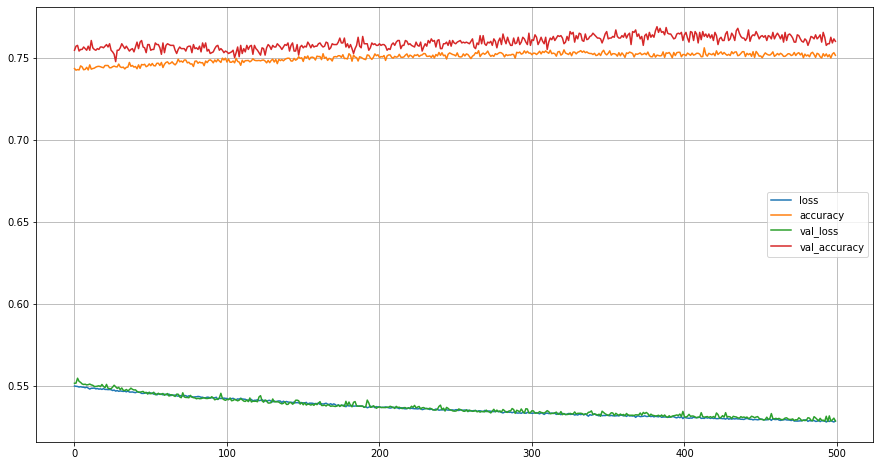

In [29]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)

# try build a model with more hidden neural (hL)

In [30]:
# hidden layer size h
dim_l1 = len(X_train.columns)
h = hL
dim_l2 = 3

model_hL = keras.models.Sequential([
    keras.layers.Input(dim_l1, name= 'Input'),
    keras.layers.Dense(h, activation='relu', name = 'H'),
    keras.layers.Dense(dim_l2, activation='softmax')
])

model_hL.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
H (Dense)                    (None, 21)                231       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 66        
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________
